In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from collections import Counter
import time

In [2]:
df = pd.read_csv('GPS.csv')

In [3]:
df.shape

(5653053, 6)

In [4]:
df.head()

,user,timestamp,x,y,z,class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653053 entries, 0 to 5653052
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       object 
 1   timestamp  object 
 2   x          float64
 3   y          float64
 4   z          float64
 5   class      object 
dtypes: float64(3), object(3)
memory usage: 258.8+ MB


In [6]:
df.isnull().sum()

user         0
timestamp    0
x            0
y            0
z            0
class        0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,5653053.0,1.499442,4.657316,-73.209999,-1.30,0.71,4.65,78.400002
y,5653053.0,1.483885,6.262899,-78.400002,-1.79,2.13,6.26,78.339996
z,5653053.0,2.484874,5.800348,-78.440002,-0.96,3.50,7.32,78.400002


In [8]:
df = df.sample(n=53053, random_state=1)

In [9]:
print("Size of database is:",df.shape)

Size of database is: (53053, 6)


In [10]:
print ("Number of rows in input data: ",df.shape[0])
print ("Number of columns in input data: ",df.shape[1])
print ("column names: ",list(df.columns))
print ("Number of unique users: ",df['user'].unique().size)

Number of rows in input data:  53053
Number of columns in input data:  6
column names:  ['user', 'timestamp', 'x', 'y', 'z', 'class']
Number of unique users:  32


In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [12]:
df.head()

,user,timestamp,x,y,z,class
1250266,adaaae1a67ea9e43abd60ba945eccda0cb8821e0,2018-06-07 10:16:06.007,6.89,-5.170000,4.75,bus
3107594,d7a1230d94f91a32cc079809748e52e8a4a6a22f,2018-10-18 12:00:50.360,-1.48,16.190001,1.29,walk
605733,a59868c6eb3645eedbb343ce8c336ec6f2ef2324,2018-04-14 02:23:35.712,0.26,-8.400000,3.17,walk
5484679,f7ae1ce141c26db40ea8b090fb568a0c965310aa,2019-05-27 13:51:51.300,6.57,-4.580000,4.77,car
5650390,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,2019-09-13 17:01:49.800,11.01,1.700000,1.29,bike


C:\Users\Win\AppData\Local\Temp\ipykernel_1152\804119140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='Blues')


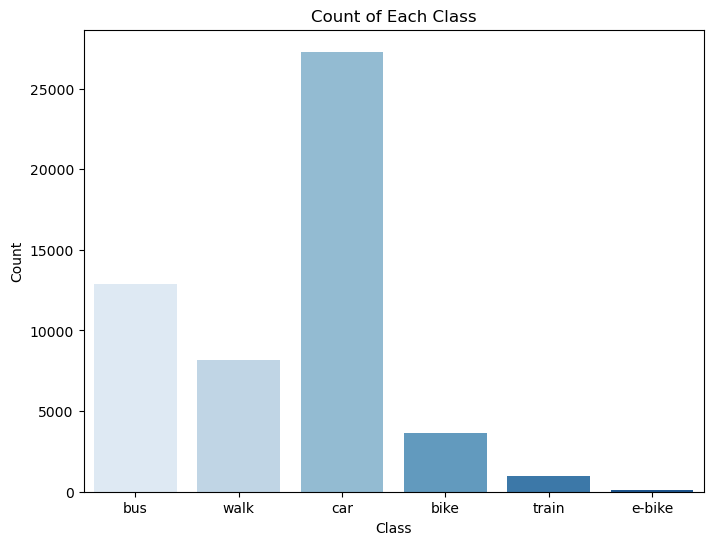

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class', palette='Blues')
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

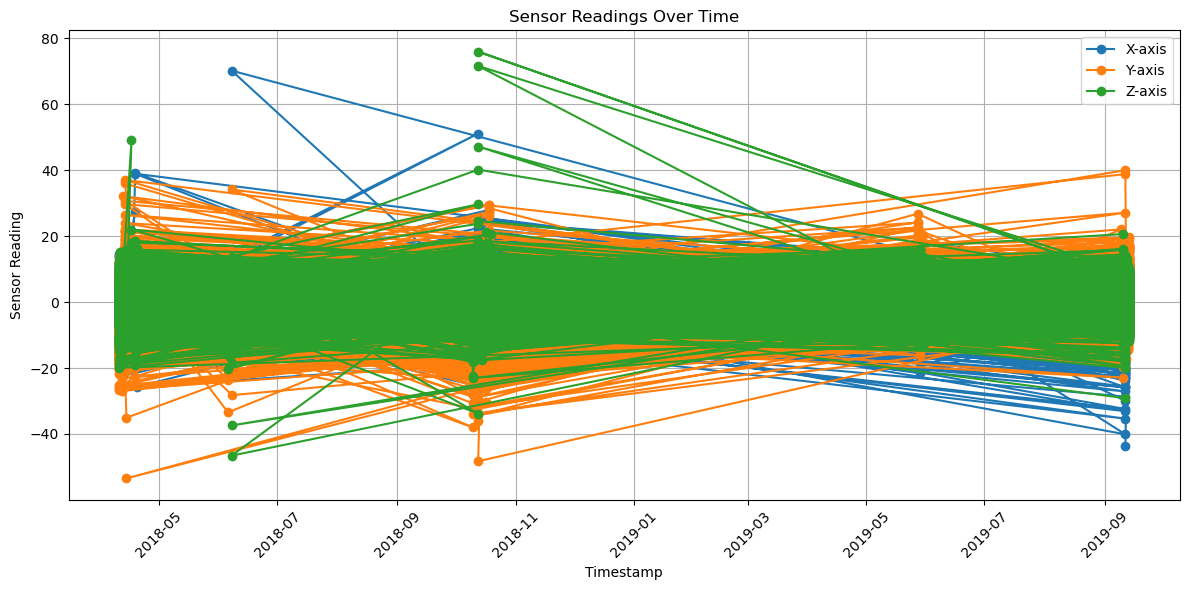

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['x'], marker='o', label='X-axis')
plt.plot(df['timestamp'], df['y'], marker='o', label='Y-axis')
plt.plot(df['timestamp'], df['z'], marker='o', label='Z-axis')
plt.title('Sensor Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Reading')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

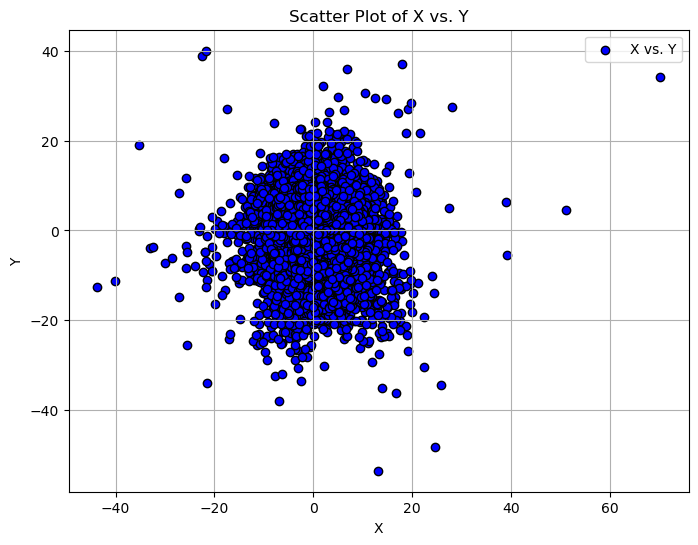

In [15]:
# Scatter plot of x vs. y
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c='blue', label='X vs. Y', edgecolors='k')
plt.title('Scatter Plot of X vs. Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

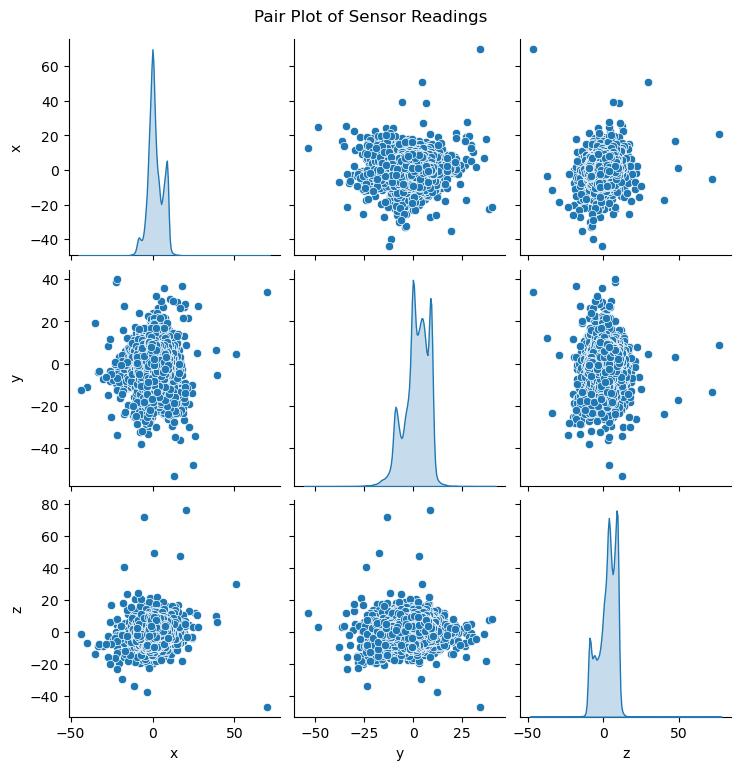

In [16]:
# Pair plot
sns.pairplot(df[['x', 'y', 'z']], diag_kind='kde')
plt.suptitle('Pair Plot of Sensor Readings', y=1.02)
plt.show()

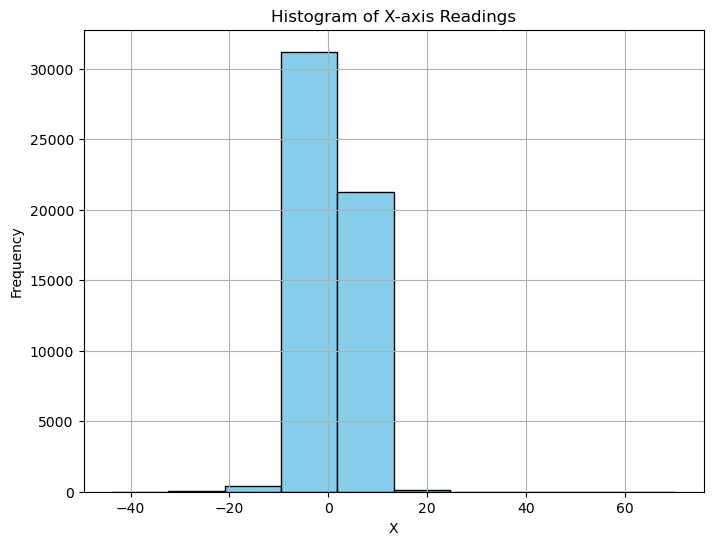

In [17]:
# Histogram of X-axis readings
plt.figure(figsize=(8, 6))
plt.hist(df['x'], bins=10, color='skyblue', edgecolor='k')
plt.title('Histogram of X-axis Readings')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

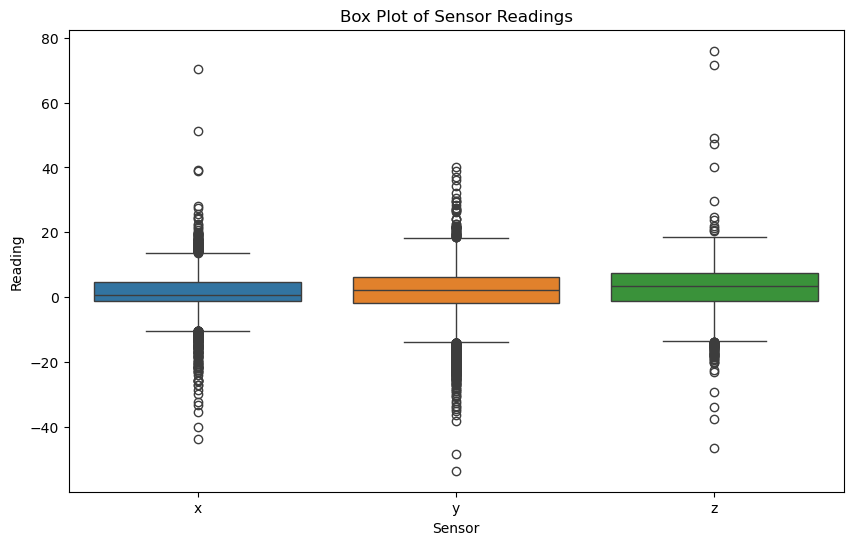

In [18]:
# Box plot for sensor readings
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['x', 'y', 'z']])
plt.title('Box Plot of Sensor Readings')
plt.xlabel('Sensor')
plt.ylabel('Reading')
plt.show()

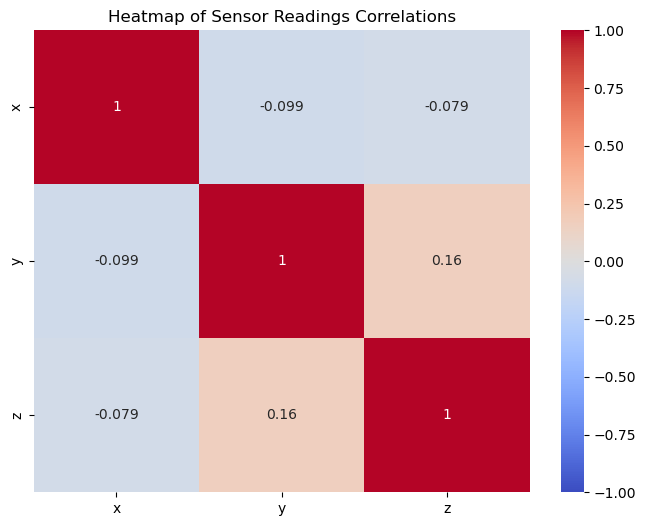

In [19]:
# Compute correlation matrix
corr = df[['x', 'y', 'z']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Sensor Readings Correlations')
plt.show()

In [20]:
class_counts = df['class'].value_counts()
print(class_counts)

class
car       27284
bus       12872
walk       8140
bike       3657
train      1005
e-bike       95
Name: count, dtype: int64


In [21]:
# Create a new DataFrame for downsampled data
downsampled_dfs = []

for class_name, group in df.groupby('class'):
    # Downsample to the minimum class size
    downsampled_group = group.sample(n=10000, random_state=42, replace = True)  # Set a random seed for reproducibility
    downsampled_dfs.append(downsampled_group)

# Concatenate the downsampled groups into one DataFrame
balanced_df = pd.concat(downsampled_dfs, ignore_index=True)

In [22]:
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
new_class_counts = balanced_df['class'].value_counts()
print(new_class_counts)

class
bus       10000
e-bike    10000
bike      10000
walk      10000
car       10000
train     10000
Name: count, dtype: int64


In [24]:
balanced_df.to_csv('balanced_data.csv', index=False)  # Save to CSV
balanced_df

,user,timestamp,x,y,z,class
0,c453226e3616ae821cdcb38f38481c2a20f2482f,2018-10-16 07:34:43.760,7.37,-0.84,-4.68,bus
1,ecfb0929250fb6dda66a4065441230ab27f094e5,2018-06-06 18:50:11.248,-0.93,8.55,6.94,e-bike
2,ecfb0929250fb6dda66a4065441230ab27f094e5,2018-06-05 07:41:45.221,7.80,3.89,-5.40,e-bike
3,d7a1230d94f91a32cc079809748e52e8a4a6a22f,2018-10-14 15:35:56.558,8.99,13.66,8.59,bike
4,d7a1230d94f91a32cc079809748e52e8a4a6a22f,2018-10-10 20:12:13.643,4.80,6.44,3.78,bike
...,...,...,...,...,...,...
59995,de9892b879c83ea3d24fb4560873107cc4e86d48,2019-09-10 15:41:31.400,-1.29,5.03,-1.18,walk
59996,ecfb0929250fb6dda66a4065441230ab27f094e5,2018-06-05 07:40:40.706,6.45,3.54,-4.32,e-bike
59997,c453226e3616ae821cdcb38f38481c2a20f2482f,2018-10-14 11:37:32.730,-5.66,5.33,-5.43,bike
59998,a59868c6eb3645eedbb343ce8c336ec6f2ef2324,2018-04-12 08:51:05.642,0.24,7.43,6.85,bus


C:\Users\Win\AppData\Local\Temp\ipykernel_1152\3015249587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_df, x='class', palette='Blues')


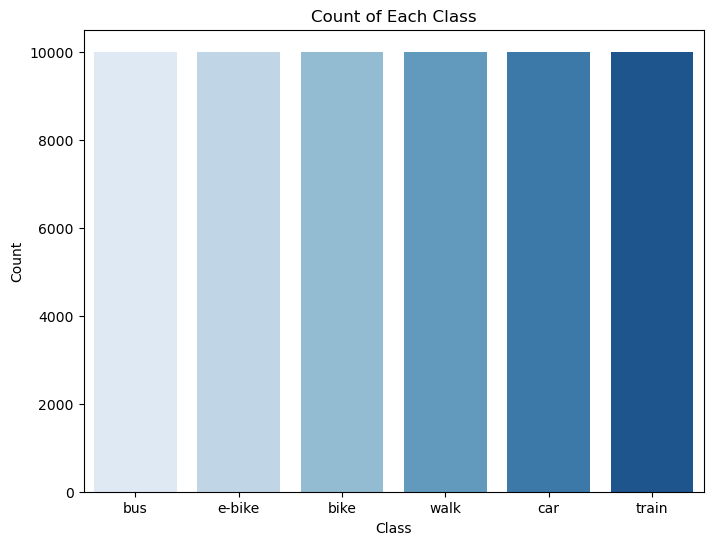

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_df, x='class', palette='Blues')
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

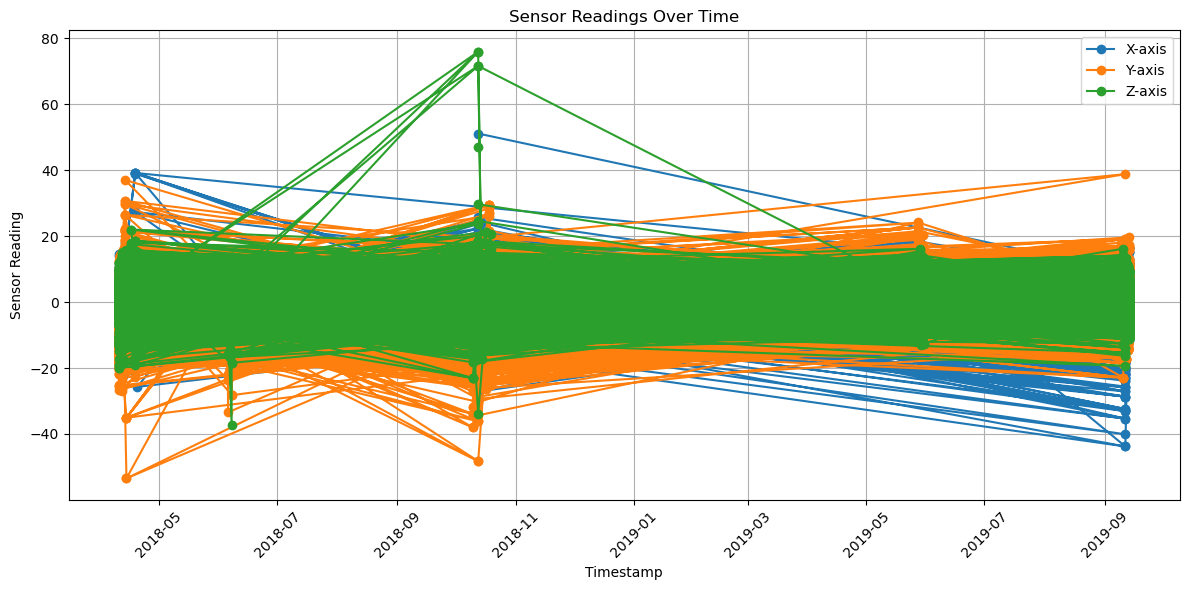

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(balanced_df['timestamp'], balanced_df['x'], marker='o', label='X-axis')
plt.plot(balanced_df['timestamp'], balanced_df['y'], marker='o', label='Y-axis')
plt.plot(balanced_df['timestamp'], balanced_df['z'], marker='o', label='Z-axis')
plt.title('Sensor Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Reading')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

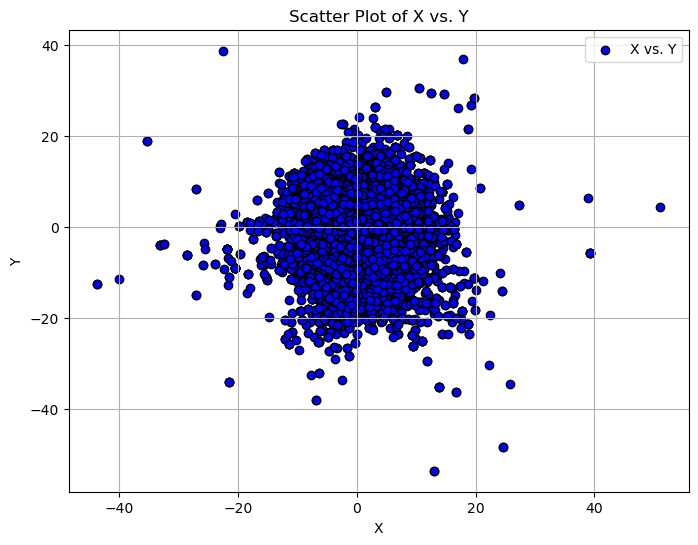

In [27]:
# Scatter plot of x vs. y
plt.figure(figsize=(8, 6))
plt.scatter(balanced_df['x'],balanced_df['y'], c='blue', label='X vs. Y', edgecolors='k')
plt.title('Scatter Plot of X vs. Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

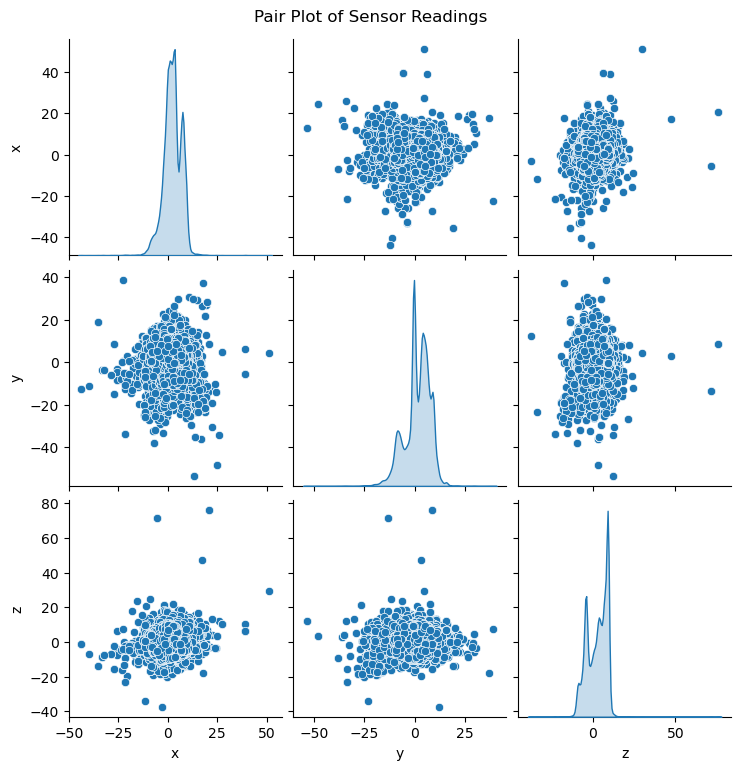

In [28]:
# Pair plot
sns.pairplot(balanced_df[['x', 'y', 'z']], diag_kind='kde')
plt.suptitle('Pair Plot of Sensor Readings', y=1.02)
plt.show()

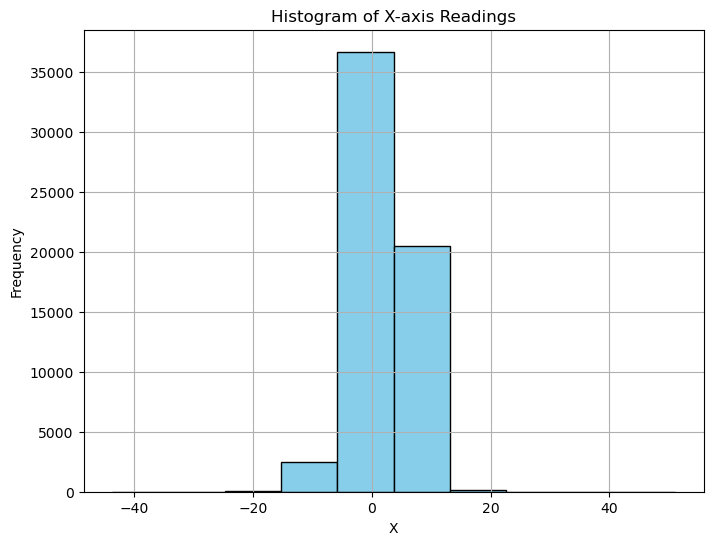

In [29]:
# Histogram of X-axis readings
plt.figure(figsize=(8, 6))
plt.hist(balanced_df['x'], bins=10, color='skyblue', edgecolor='k')
plt.title('Histogram of X-axis Readings')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

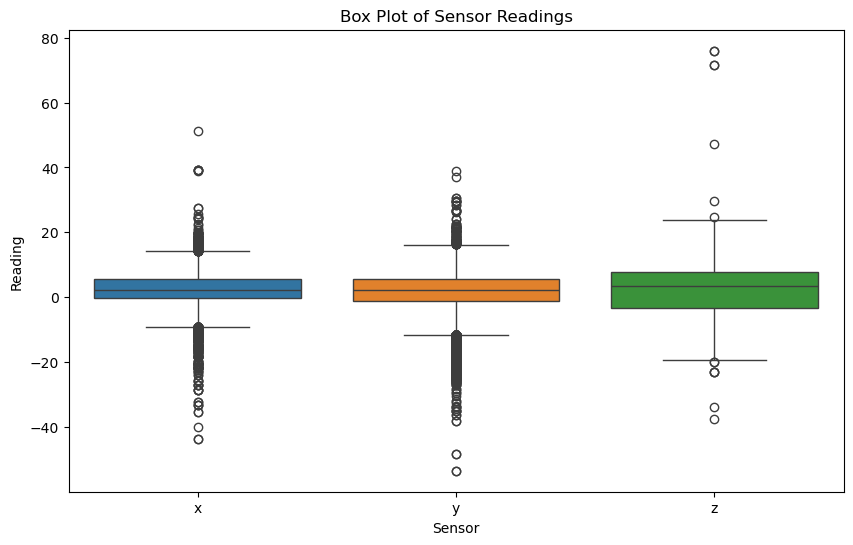

In [30]:
# Box plot for sensor readings
plt.figure(figsize=(10, 6))
sns.boxplot(data=balanced_df[['x', 'y', 'z']])
plt.title('Box Plot of Sensor Readings')
plt.xlabel('Sensor')
plt.ylabel('Reading')
plt.show()

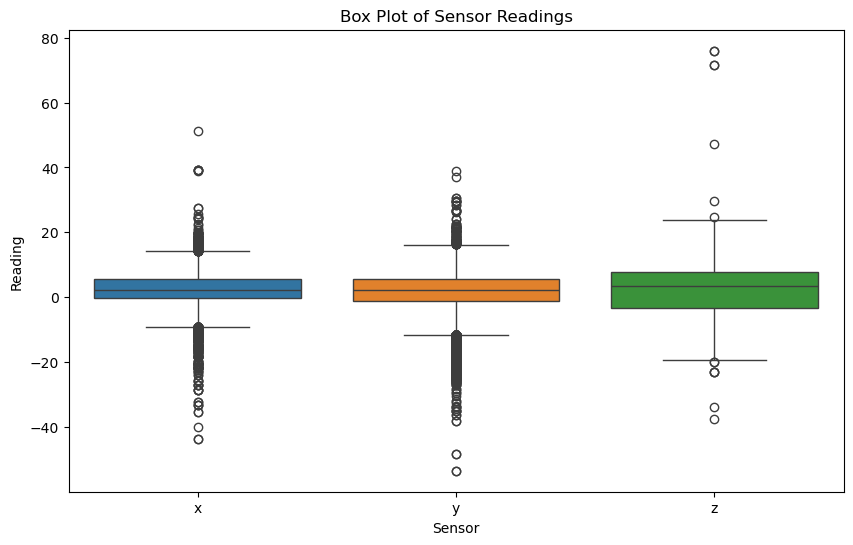

In [31]:
# Box plot for sensor readings
plt.figure(figsize=(10, 6))
sns.boxplot(data=balanced_df[['x', 'y', 'z']])
plt.title('Box Plot of Sensor Readings')
plt.xlabel('Sensor')
plt.ylabel('Reading')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pickle
import joblib

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = balanced_df[['x', 'y', 'z']]
y = balanced_df['class']
#scaler = StandardScaler()
#X_scaled = scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
X

,x,y,z
0,7.37,-0.84,-4.68
1,-0.93,8.55,6.94
2,7.80,3.89,-5.40
3,8.99,13.66,8.59
4,4.80,6.44,3.78
...,...,...,...
59995,-1.29,5.03,-1.18
59996,6.45,3.54,-4.32
59997,-5.66,5.33,-5.43
59998,0.24,7.43,6.85


In [35]:
y

0           bus
1        e-bike
2        e-bike
3          bike
4          bike
          ...  
59995      walk
59996    e-bike
59997      bike
59998       bus
59999      walk
Name: class, Length: 60000, dtype: object

In [36]:
all_model_result = pd.DataFrame(columns=['Algorithm', 'Classifier' , 'Train-Accuracy', 'Test-Accuracy' ])

In [37]:
# Create and train model
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)

# Evaluate model
y_pred = model_KNN.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        bike       0.69      0.81      0.75      2971
         bus       0.74      0.72      0.73      3036
         car       0.73      0.66      0.69      2996
      e-bike       0.98      1.00      0.99      3020
       train       0.95      1.00      0.97      2960
        walk       0.81      0.71      0.75      3017

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.81     18000
weighted avg       0.82      0.82      0.81     18000



In [38]:
model_KNN.score(X_test, y_test)

0.8152222222222222

In [39]:
train = model_KNN.score(X_train, y_train)
test = model_KNN.score(X_test, y_test)

In [40]:
new = ['KNN','KNeighborsClassifier',train, test]
all_model_result.loc[0] = new

In [44]:
# Define parameter grids (without 'model__' prefix)
param_grids = {
    'decision_tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'random_forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'svc': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

In [46]:
# Define models
models = {
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'svc': SVC()
}

In [48]:
# Perform Grid Search and save best models
best_models = {}
for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    # Save the best model for each algorithm
    joblib.dump(best_models[model_name], f'{model_name}_model.pkl')
    print(f"{model_name} model saved as {model_name}_model.pkl")

Performing Grid Search for decision_tree...
Best parameters for decision_tree: {'max_depth': 30, 'min_samples_split': 2}
decision_tree model saved as decision_tree_model.pkl
Performing Grid Search for random_forest...
Best parameters for random_forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
random_forest model saved as random_forest_model.pkl
Performing Grid Search for svc...
Best parameters for svc: {'C': 10, 'kernel': 'rbf'}
svc model saved as svc_model.pkl


In [49]:
# Evaluate the best model and save the results
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\nClassification report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    
    # Save model performance results
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    new = [model_name, model_name.capitalize(), train_accuracy, test_accuracy]
    all_model_result.loc[len(all_model_result)] = new


Classification report for decision_tree:

              precision    recall  f1-score   support

        bike       0.86      0.93      0.90      2971
         bus       0.81      0.78      0.79      3036
         car       0.78      0.73      0.76      2996
      e-bike       0.99      1.00      1.00      3020
       train       0.98      1.00      0.99      2960
        walk       0.86      0.86      0.86      3017

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000


Classification report for random_forest:

              precision    recall  f1-score   support

        bike       0.89      0.95      0.92      2971
         bus       0.84      0.83      0.83      3036
         car       0.84      0.78      0.81      2996
      e-bike       1.00      1.00      1.00      3020
       train       0.98      1.00      0.99      2960
        walk       0.90      0.90      0.90   

In [50]:
all_model_result

,Algorithm,Classifier,Train-Accuracy,Test-Accuracy
0,KNN,KNeighborsClassifier,0.876952,0.815222
1,decision_tree,Decision_tree,0.999048,0.883167
2,random_forest,Random_forest,1.000000,0.908611
3,svc,Svc,0.728690,0.724222


In [51]:
joblib.dump(model_KNN, 'knn_model.pkl')

['knn_model.pkl']